# **Customer propensity to purchase**


# **Introduction**

This is my first Kaggle, and my first foray into data analysis using python. The following kernel contains the steps, including approaches to this classification task, enumerated below for assessing the dataset:<br><br>


## Get the Dataset

To create a machine learning model, the first thing  we required is a dataset as machine learning model completly works on data. The collected data for a perticular problem in a proper format is known as the dataset.
Dataset may be different from one another to another according to purpose. Some common dataset formats are CSV,JSON,XLXS and more.

## Import libraries we required

depends on our requirements we need to use many libraries in python . The common libraries are pandas, numpy, Matplotlib, seaborn, scikit.pandas is a software library written for the Python programming language for data manipulation and analysis. numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. and seaborn and matplot lib is usually used for data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fetch data

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-propensity-to-purchase-data/training_sample.csv
/kaggle/input/customer-propensity-to-purchase-data/testing_sample.csv


In [3]:
data = pd.read_csv("/kaggle/input/customer-propensity-to-purchase-data/training_sample.csv")

In [4]:
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [5]:
data.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
## analyse the data
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


## Data Preprocessing

### Lets check our data how much noisy 

In [7]:
data.isna().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

from above, we can identify there is no nan values in the data set

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [9]:
X =data[['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk']]
y=data['ordered']

## Feature selection

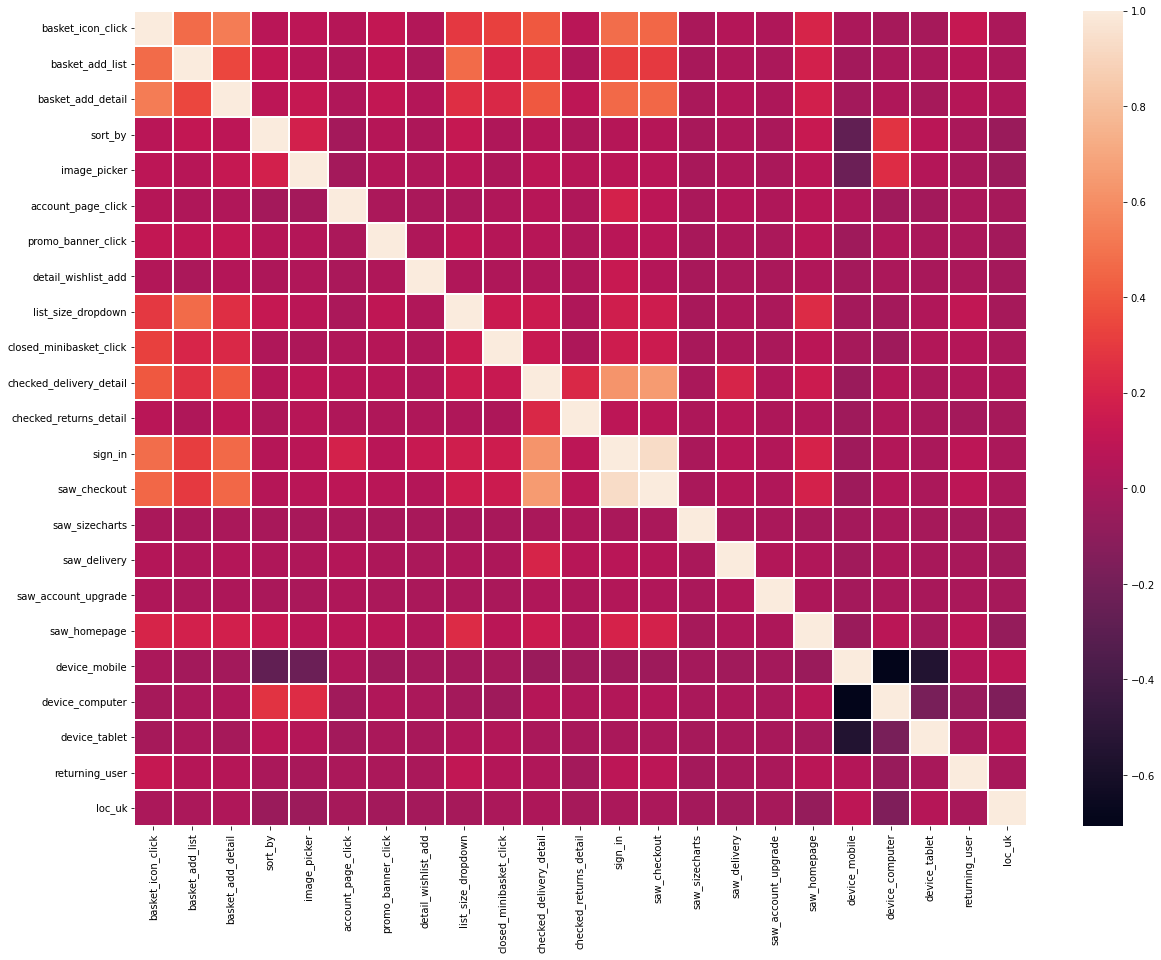

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),linewidth=2)
plt.show()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X, 0.7)
len(set(corr_features))


2

In [13]:
corr_features

{'device_computer', 'saw_checkout'}

In [14]:
X = X.drop(corr_features,axis=1)
X

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,checked_returns_detail,sign_in,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
455397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
455398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
455399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Exploratory Data Analysis

How many users are purchased

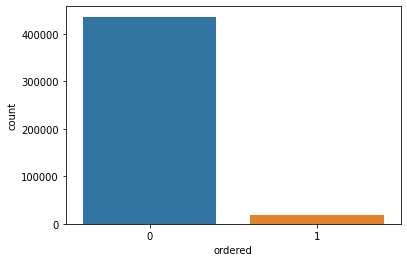

In [15]:
# 
ax = sns.countplot(data=data,x="ordered")
plt.show()

In [16]:
dataframe=data

### Model creation

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (364320, 21)
y_train: (364320,)
X_test: (91081, 21)
y_test: (91081,)


In [19]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train,y_train)

LogisticRegression()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_pred7 = classifier7.predict(X_test)
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Metric Evaluation

[[82445  4850]
 [   21  3765]]


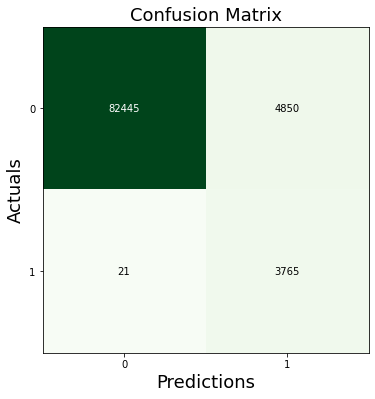

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [22]:
logreg=accuracy_score(y_test,y_pred7)
rocreg=roc_auc_score(y_test, y_pred7)
print('Accuracy : ',logreg,'\nROC Score : ',rocreg)

Accuracy :  0.9465201304333505 
ROC Score :  0.9694472555987863


In [23]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     87295
           1       0.44      0.99      0.61      3786

    accuracy                           0.95     91081
   macro avg       0.72      0.97      0.79     91081
weighted avg       0.98      0.95      0.96     91081



### Hyper tuning

In [24]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier7,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 99.26 %
Best Parameter of LR: {'C': 0.001, 'penalty': 'l2'}


By using above parameter we get 99.26% accuracy

##  Testing

In [25]:
classifierhyp = LogisticRegression(C=0.001,penalty='l2')
classifierhyp.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [26]:
test_df= pd.read_csv("/kaggle/input/customer-propensity-to-purchase-data/testing_sample.csv")

In [27]:
test_df

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [28]:
test=test_df[['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade', 'saw_homepage',
       'device_mobile', 'device_tablet', 'returning_user', 'loc_uk']]

In [29]:
test_df['result']=classifierhyp.predict(test)

In [30]:
(test_df)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,result
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [31]:
test_df.result.value_counts()

0    151655
Name: result, dtype: int64

In [32]:
test_df.to_csv('results.csv')